# Business Case - Thiago Rodrigues

### 0.0 Importing and Preparing the Base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
from datetime import datetime

#### 0.1 1st impressions

In [2]:
results = pd.read_csv('ml_project1_data.csv',parse_dates=['Year_Birth','Dt_Customer'])
campaign_results = results.copy()
campaign_results.shape

(2240, 29)

In [3]:
campaign_results.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
sample = campaign_results.head(10).T
sample

,0,1,2,3,4,5,6,7,8,9
ID,5524,2174,4141,6182,5324,7446,965,6177,4855,5899
Year_Birth,1957-01-01 00:00:00,1954-01-01 00:00:00,1965-01-01 00:00:00,1984-01-01 00:00:00,1981-01-01 00:00:00,1967-01-01 00:00:00,1971-01-01 00:00:00,1985-01-01 00:00:00,1974-01-01 00:00:00,1950-01-01 00:00:00
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0
Kidhome,0,1,0,1,1,0,0,1,1,1
Teenhome,0,1,0,0,0,1,1,0,0,1
Dt_Customer,2012-09-04 00:00:00,2014-03-08 00:00:00,2013-08-21 00:00:00,2014-02-10 00:00:00,2014-01-19 00:00:00,2013-09-09 00:00:00,2012-11-13 00:00:00,2013-05-08 00:00:00,2013-06-06 00:00:00,2014-03-13 00:00:00
Recency,58,38,26,26,94,16,34,32,19,68
MntWines,635,11,426,11,173,520,235,76,14,28


In [5]:
camp_desc = campaign_results.describe()
camp_desc.T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


<Axes: >

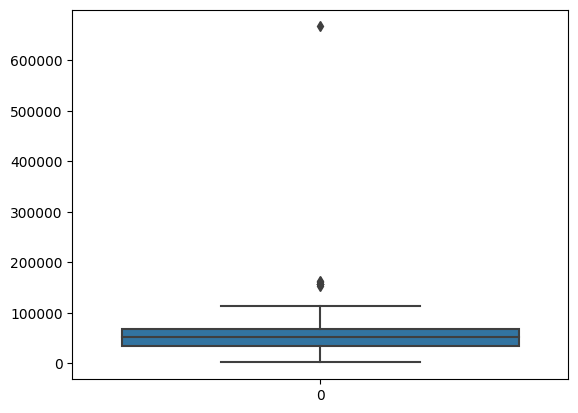

In [6]:
sns.boxplot(campaign_results['Income'])


In [7]:
campaign_results = campaign_results[campaign_results['Income']<=110000]
#campaign_results = campaign_results[campaign_results['Response']==1]

<Axes: >

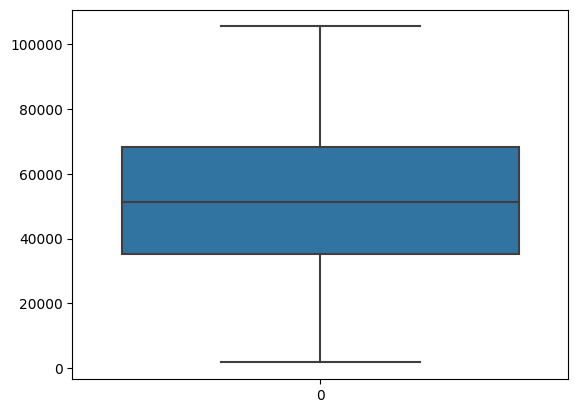

In [8]:
sns.boxplot(campaign_results['Income'])

In [9]:
# making sure nothing important is null

null_counts = campaign_results.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [10]:
print(campaign_results.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2207 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2207 non-null   int64         
 1   Year_Birth           2207 non-null   datetime64[ns]
 2   Education            2207 non-null   object        
 3   Marital_Status       2207 non-null   object        
 4   Income               2207 non-null   float64       
 5   Kidhome              2207 non-null   int64         
 6   Teenhome             2207 non-null   int64         
 7   Dt_Customer          2207 non-null   datetime64[ns]
 8   Recency              2207 non-null   int64         
 9   MntWines             2207 non-null   int64         
 10  MntFruits            2207 non-null   int64         
 11  MntMeatProducts      2207 non-null   int64         
 12  MntFishProducts      2207 non-null   int64         
 13  MntSweetProducts     2207 non-nul

#### 0.2 Columns Basic Treatment

In [11]:
# filling the N/A
campaign_results['Income'] = campaign_results['Income'].fillna(campaign_results['Income'].mode().values[0])

In [12]:
# double-checking

null_counts = campaign_results.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [13]:
# Knowing the date intervals to try to make the date of registration useful

campaign_results['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

array([[<Axes: title={'center': 'Months from Registration'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

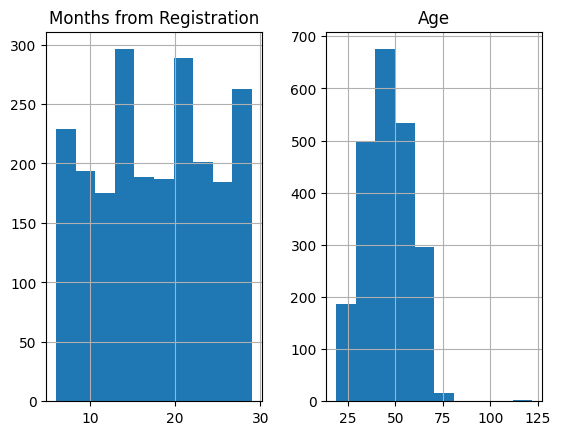

In [14]:
# Establishing the end of the year of the most recent date as the new baseline

campaign_results['Months from Registration'] = round((datetime(2014,12,31) - campaign_results['Dt_Customer']) / np.timedelta64(1, 'M'),0)
campaign_results['Age'] = round((datetime(2014,12,31) - campaign_results['Year_Birth']) / np.timedelta64(1, 'Y'),0)

campaign_results.hist(column=['Months from Registration','Age'])

<Axes: >

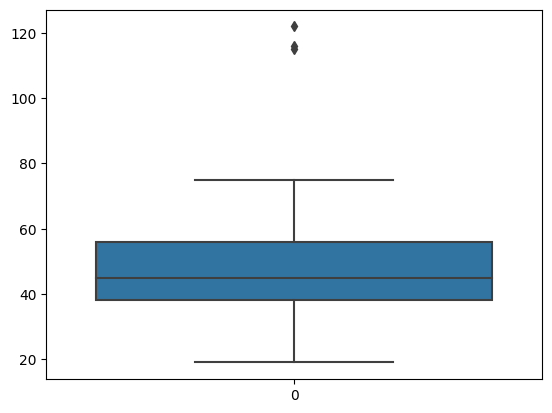

In [15]:
sns.boxplot(campaign_results['Age'])

<Axes: >

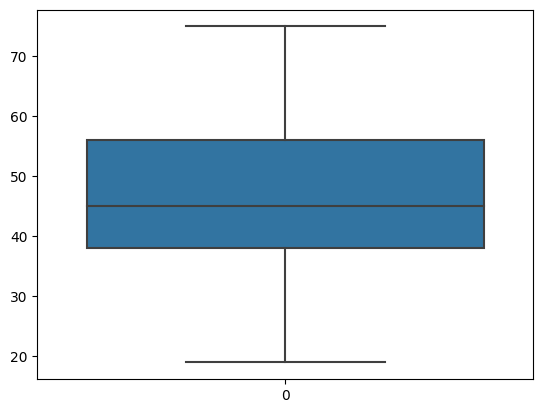

In [16]:
campaign_results = campaign_results[campaign_results['Age']<80]
sns.boxplot(campaign_results['Age'])

In [17]:
# Adding all the acceptance from the previous campaigns in order to understand the impact since the individual volume is low

campaign_results['Total Campaigns'] = campaign_results['AcceptedCmp1'] + campaign_results['AcceptedCmp2'] + campaign_results['AcceptedCmp3'] + campaign_results['AcceptedCmp4'] + campaign_results['AcceptedCmp5']
campaign_results['Total Mnt Spent'] = campaign_results['MntFishProducts'] + campaign_results['MntFruits'] + campaign_results['MntMeatProducts'] + campaign_results['MntSweetProducts'] + campaign_results['MntWines']
campaign_results['Total number of purchases'] = campaign_results['NumCatalogPurchases'] + campaign_results['NumStorePurchases'] + campaign_results['NumWebPurchases']
campaign_results['Average ticket'] = np.round(campaign_results['Total Mnt Spent'] / campaign_results['Total number of purchases'],2)

In [18]:
# Renaming important columns

campaign_results = campaign_results.rename(columns={'Kidhome':'Number of kids','NumWebVisitsMonth':'Number of web visits'})

In [19]:
# Creating a perspective of the Deals over the Total Purchases

campaign_results[['ID','Total number of purchases','NumDealsPurchases']]
campaign_results['Percentage of deals'] = (campaign_results['NumDealsPurchases']/ campaign_results['Total number of purchases'])*100

In [20]:
# Encoding the categorical variables

labenc = LabelEncoder()
campaign_results['education_encoder'] = labenc.fit_transform(campaign_results['Education'])
campaign_results['marital_encoder'] = labenc.fit_transform(campaign_results['Marital_Status'])


In [21]:
# Respondents Only
#campaign_results = campaign_results[campaign_results['Response']==1]

In [22]:
# Calculate time from enrollment

#campaign_results['enrollment_months'] = ((datetime.today() - campaign_results['Dt_Customer'])/np.timedelta64(1, 'M'))
#campaign_results['enrollment_months'] = campaign_results['enrollment_months'].astype(int)

In [23]:
# Prever quem responde ou não
# Tratar dados (Escaler)
# Agrupar clientes com K-means e avaliar resultados de respondentes e não respondentes em cada cluster
# Dividir base entre respondentes e não respondentes
# Realizar agrupamentos por K-means para os dois casos
# Entender quais features fazem sentido para ambas as bases
# Avaliar qual algoritmo prevê melhor o retorno financeiro (Y = Z_Revenue), se possível avaliar por cluster


### 1.0 Exploration

#### 1.1 Influence of itens over the last campaign responses

0    1746
1     322
2      81
3      44
4      11
Name: Total Campaigns, dtype: int64

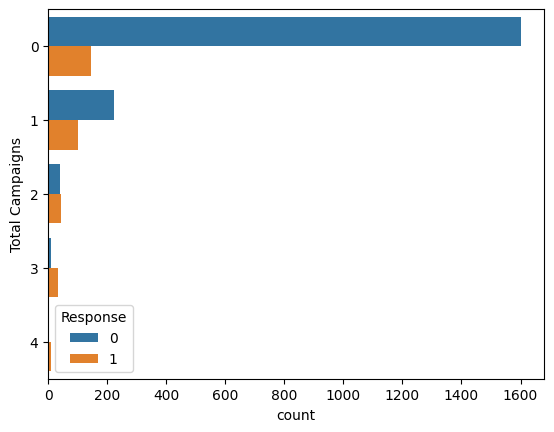

In [24]:
# Influence of previous responses over the last campaign

sns.countplot(y = 'Total Campaigns', hue='Response', data = campaign_results)
campaign_results['Total Campaigns'].value_counts()

Graduation    1113
PhD            475
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

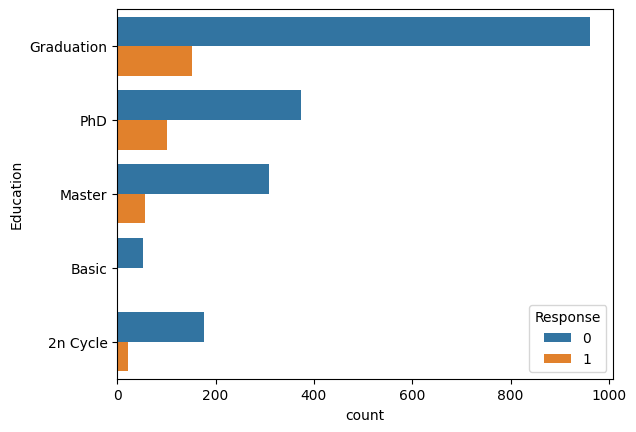

In [25]:
# Influence of Education over the last campaign

sns.countplot(y = 'Education', hue='Response', data = campaign_results)
campaign_results['Education'].value_counts()

Married     854
Together    568
Single      469
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

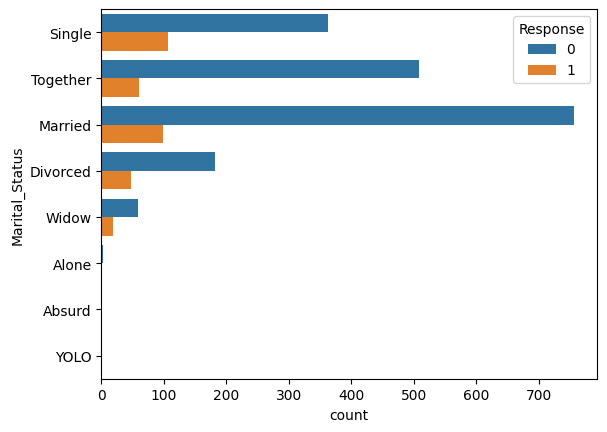

In [26]:
# Influence of Marital Status over the last campaign

sns.countplot(y = 'Marital_Status', hue='Response', data = campaign_results)
campaign_results['Marital_Status'].value_counts()

0    1275
1     883
2      46
Name: Number of kids, dtype: int64

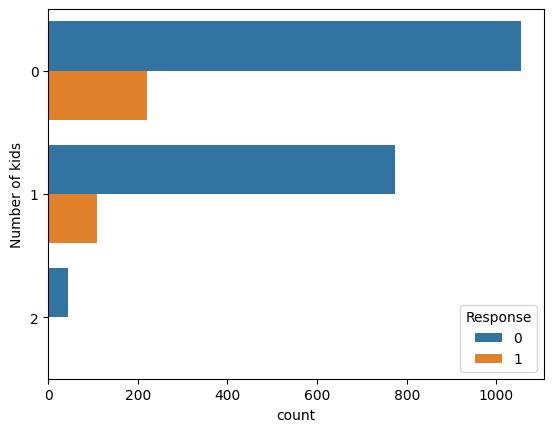

In [27]:
# Influence of num of kids living in the house over the last campaign

sns.countplot(y = 'Number of kids', hue='Response', data = campaign_results)
campaign_results['Number of kids'].value_counts()

0    1138
1    1015
2      51
Name: Teenhome, dtype: int64

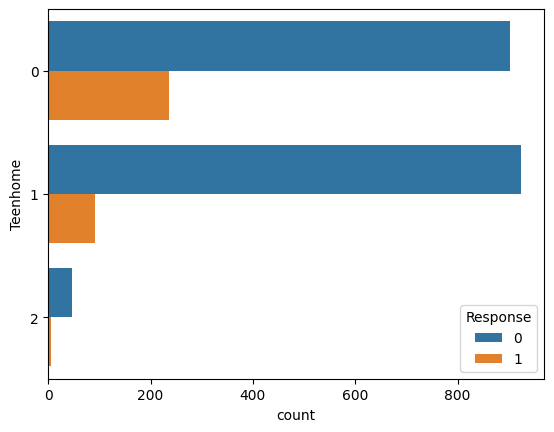

In [28]:
# Influence of num of teens living in the house over the last campaign

sns.countplot(y = 'Teenhome', hue='Response', data = campaign_results)
campaign_results['Teenhome'].value_counts()

0    2184
1      20
Name: Complain, dtype: int64

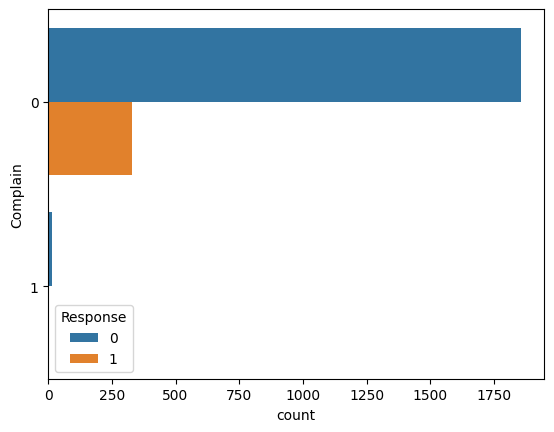

In [29]:
# Influence of num of complains over the last campaign

sns.countplot(y = 'Complain', hue='Response', data = campaign_results)
campaign_results['Complain'].value_counts()

28.0    121
9.0     110
14.0    107
15.0    106
21.0    103
26.0    102
8.0     102
16.0    101
23.0    101
24.0    100
18.0     99
11.0     97
20.0     95
27.0     93
22.0     91
17.0     88
19.0     88
7.0      86
10.0     84
25.0     82
13.0     81
12.0     78
29.0     49
6.0      40
Name: Months from Registration, dtype: int64

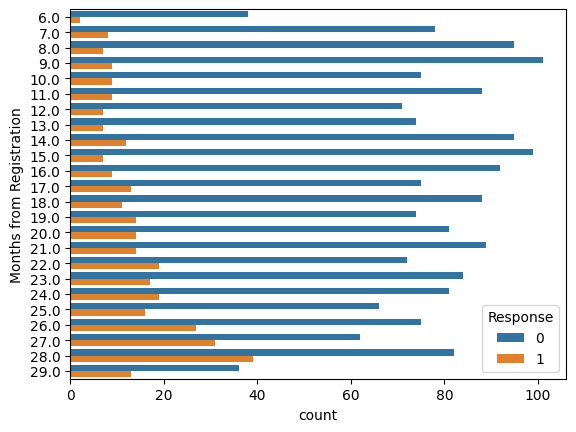

In [30]:
# Influence of tenure over the last campaign

sns.countplot(y = 'Months from Registration', hue='Response', data = campaign_results)
campaign_results['Months from Registration'].value_counts()

39.0    88
44.0    85
40.0    82
43.0    78
37.0    76
45.0    75
50.0    74
42.0    71
46.0    70
41.0    69
59.0    55
36.0    53
57.0    52
63.0    52
47.0    51
49.0    50
56.0    50
38.0    50
55.0    49
61.0    49
60.0    48
52.0    44
53.0    44
48.0    44
33.0    43
64.0    42
51.0    41
32.0    41
29.0    41
58.0    41
35.0    39
31.0    38
34.0    38
62.0    35
54.0    35
30.0    32
26.0    29
66.0    29
27.0    29
65.0    29
28.0    27
67.0    21
25.0    18
69.0    16
68.0    16
24.0    15
23.0    13
71.0     7
70.0     7
72.0     6
22.0     5
20.0     5
21.0     3
19.0     2
74.0     1
75.0     1
Name: Age, dtype: int64

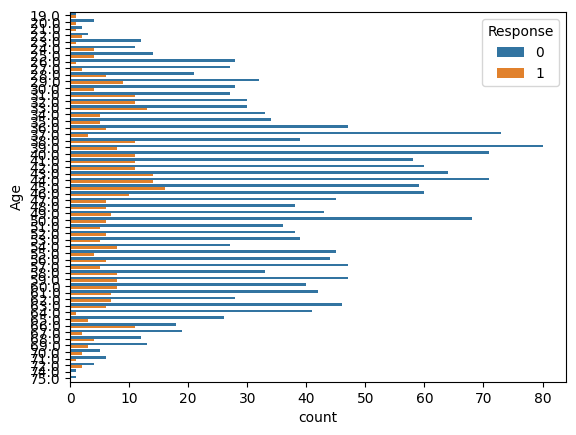

In [31]:
# Influence of age over the last campaign

sns.countplot(y = 'Age', hue='Response', data = campaign_results)
campaign_results['Age'].value_counts()

#### 1.2 Exploring the correlations

In [32]:
totalvar = ['Income','Number of kids','Teenhome','Age','Months from Registration','Recency','Total Campaigns','Total Mnt Spent',
            'Total number of purchases', 'Percentage of deals','NumDealsPurchases', 'education_encoder', 'marital_encoder']

##### 1.2.1 Exploring all

In [33]:
fig = px.scatter_matrix(campaign_results[totalvar],
width=1200, height=1600)
fig.show()

In [34]:
# Removing perc deals outliers

campaign_results = campaign_results[campaign_results['Percentage of deals']<=100]

In [35]:
# Without Outliers

fig = px.scatter_matrix(campaign_results[totalvar],
width=1200, height=1600)
fig.show()

##### 1.2.2 Correlations Heatmap

<Axes: >

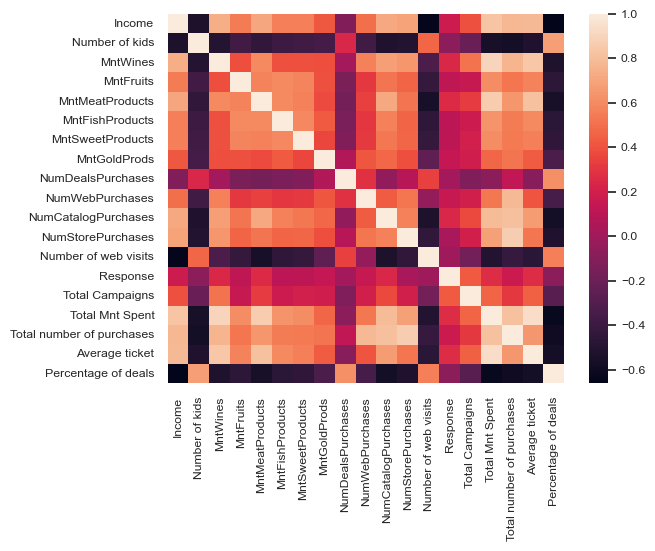

In [36]:
# Dropping all the columns with low correlations

camp_correl = campaign_results.drop(campaign_results[['ID','Dt_Customer','Z_CostContact','Z_Revenue','Education','Marital_Status', 'Recency', 'Teenhome','Year_Birth', 'Complain',
                                                      'education_encoder','marital_encoder','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2',
                                                      'Months from Registration', 'Age']],axis=1)
sns.set(font_scale=0.8)
sns.heatmap(camp_correl.corr())

In [37]:
# Defining the final features to cluster the clients

finalvars = ['ID','Income','Number of kids','Number of web visits', 'Total number of purchases', 'Average ticket', 'Percentage of deals']

In [38]:
# Detailing the correlation between types of variables

fig = px.scatter_matrix(campaign_results[finalvars[1:]],
width=1200, height=1600)
fig.show()

<Axes: >

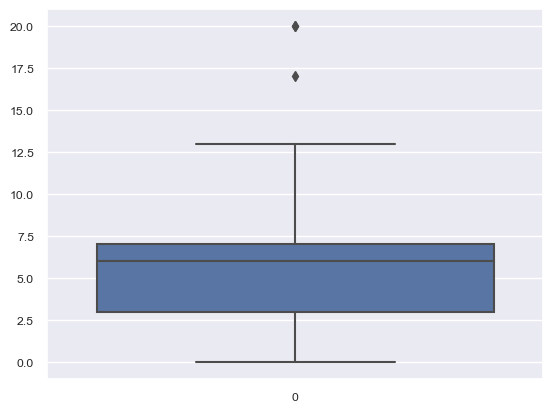

In [39]:
sns.boxplot(campaign_results['Number of web visits'])

In [40]:
# Removing outliers

campaign_results = campaign_results[campaign_results['Number of web visits']<13]


#### 1.3 Hypothesis Testing

Based on the correlations heatmap, we have some interesting hypothesis to work on:

* Those who visit the site more tend to buy less, with lower Average tickets and using more discounts
* Customers with children at home tend to buy less (in amount and volume)
* Customers with higher Incomes tend to buy more and to respond to more campaigns

In order to gain speed in the analysis, the hypothesis tests were performed in this google spreadsheet: 
https://docs.google.com/spreadsheets/d/14TKahWDbM2QrK2RcJnrKY9fKxBC9B9p7tU2rJUgZlaI

### 2.0 Customer Segmentation

#### 2.1 Data Preparation

In [41]:
results_to_cluster = campaign_results[finalvars]

In [42]:
stdscaler = StandardScaler()
ids = results_to_cluster['ID']
x_cluster = results_to_cluster[finalvars[1:]]
x_cluster_scaled = stdscaler.fit_transform(x_cluster)

In [43]:
wcss = []
for i in range(1, 11):
  #print(i)
  kmeans_camp = KMeans(n_clusters=i, random_state=0)
  kmeans_camp.fit(x_cluster_scaled)
  wcss.append(kmeans_camp.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

In [44]:
# Suport to decide the number of clusters based on the inertia

elbow = px.line(x = range(1,11), y = wcss)
elbow.show()

#### 2.2 The model

##### 2.2.1 Training the model

In [45]:
# training

kmeans_camp = KMeans(n_clusters=4, random_state=0, init='k-means++', n_init=10)
labels = kmeans_camp.fit_predict(x_cluster_scaled)

# Turning it back into a df
x_cluster_df = pd.DataFrame(x_cluster_scaled,columns=finalvars[1:])
x_cluster_df['labels'] = labels
x_cluster_df

,Income,Number of kids,Number of web visits,Total number of purchases,Average ticket,Percentage of deals,labels
0,0.309977,-0.824233,0.748758,1.313454,1.229379,-0.612571,2
1,-0.265413,1.037075,-0.126854,-1.204844,-1.003613,1.515698,1
2,0.967377,-0.824233,-0.564660,1.033643,0.089424,-1.118034,2
3,-1.226412,1.037075,0.310952,-0.925033,-0.908037,0.540241,1
4,0.317539,1.037075,-0.126854,0.194210,-0.175755,0.679592,1
...,...,...,...,...,...,...,...
2190,0.460484,-0.824233,-0.126854,0.474021,1.190454,-0.679079,2
2191,0.596647,2.898384,0.748758,0.334116,-0.175755,1.320607,1
2192,0.253531,-0.824233,0.310952,0.753832,1.163693,-1.085519,2
2193,0.851850,-0.824233,-1.002467,1.173548,0.108191,-0.853268,2


In [46]:
def label_cluster (row):
   if row['labels'] == 0:
      return '1. Heavy Spenders'
   elif row['labels'] == 1:
      return '3. Discount Lovers'
   elif row['labels'] == 2:
      return '2. Smart Spenders'
   else:
      return '4. Casuals'

In [47]:
x_cluster_df['Clusters'] = x_cluster_df.apply(lambda row: label_cluster(row),axis=1)
x_cluster_df = x_cluster_df[['Income', 'Number of kids', 'Number of web visits',
       'Total number of purchases', 'Average ticket', 'Percentage of deals', 'Clusters']]

In [48]:
# Visualization of each cluster behavior

polar=x_cluster_df.groupby('Clusters').mean().reset_index()
polar=pd.melt(polar,id_vars=['Clusters'])
fig4 = px.line_polar(polar, r='value', theta='variable', color='Clusters', line_close=True,height=600,width=1000)

fig4.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



##### 2.2.1 Results

##### Cluster 1: Heavy spenders
Very high level of income, they make many purchases with a very high average ticket and almost negligible use of promotions. In addition, they practically do not access the website, indicating physical purchases or a very targeted access to the purchase. Finally, they are the group with the highest response rate in previous surveys and do not usually have children at home.
##### Cluster 2: Smart spenders
High level of income, they make many purchases with a high average ticket, medium volume of accesses to the site and low use of promotions. They behave similarly to heavy spenders, but tend to research more and be more contained in the average ticket despite buying more. They don't usually have children at home either.
##### Cluster 3: Discount lovers
Low level of income, a lot of use of promotions and few purchases (both in volume and in value), despite the high volume of accesses to the site, indicating that they should search a lot and buy only when there are promotions. In addition, they often have children at home.
##### Cluster 4: Casuals
Low level of income with average volume of visits to the site and use of promotions. Like discount lovers, they seem to have purchases directly linked to promotions, despite buying more often. Finally, they have a lower volume of access to the website and less engagement in campaigns.

##### 2.2.3 Adding it back to the original dataframe

In [49]:
cluster_labels = kmeans_camp.labels_
final_cluster_df = pd.DataFrame({'ID': ids, 'Cluster': cluster_labels})
final_cluster_df

,ID,Cluster
0,5524,2
1,2174,1
2,4141,2
3,6182,1
4,5324,1
...,...,...
2235,10870,2
2236,4001,1
2237,7270,2
2238,8235,2


In [50]:
# How many clients in each cluster?

final_cluster_df.groupby('Cluster').size().reset_index()


,Cluster,0
0,0,489
1,1,860
2,2,496
3,3,350


In [51]:
campaign_results = campaign_results.merge(final_cluster_df,how='left',on='ID')

In [52]:
def label_cluster_final (row):
   if row['Cluster'] == 0:
      return '1. Heavy Spenders'
   elif row['Cluster'] == 1:
      return '3. Discount Lovers'
   elif row['Cluster'] == 2:
      return '2. Smart Spenders'
   else:
      return '4. Casuals'

In [53]:
campaign_results['Clusters'] = campaign_results.apply(lambda row: label_cluster_final(row),axis=1)
#campaign_results.drop('Cluster',axis=1)
campaign_results.shape

(2195, 40)

#### 2.3 Summarizing the main behaviors per cluster

##### 2.3.1 Main behaviors

In [54]:
# Summary of purchase behavior per cluster

cluster_size = campaign_results.groupby('Clusters').size().reset_index()
cluster_totals = campaign_results.groupby('Clusters')['Total Mnt Spent','Total number of purchases'].sum()

purchase_summary_df = cluster_size.merge(cluster_totals,on='Clusters',how='left')
purchase_summary_df.rename(columns={ purchase_summary_df.columns[1]: 'Qt. of customers' }, inplace = True)
purchase_summary_df['Average Ticket'] = np.round(purchase_summary_df['Total Mnt Spent']/purchase_summary_df['Total number of purchases'],1)
purchase_summary_df['Purchases per person'] = np.round(purchase_summary_df['Total number of purchases']/purchase_summary_df['Qt. of customers'],0)
purchase_summary_df['Amount per person'] = np.round(purchase_summary_df['Total Mnt Spent']/purchase_summary_df['Qt. of customers'],0)
purchase_summary_df

# Dividir custo por cluster: custo total/todos os participantes do cluster
# Dividir receita por cluster: receita total/apenas os respondentes
# No final, fazer o comparativo de quanto custou a pesquisa e quanto teve de retorno em cada cluster

/var/folders/75/3546tkr52rj4lmrjh1tbw_zw0000gn/T/ipykernel_37215/2584265450.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Clusters,Qt. of customers,Total Mnt Spent,Total number of purchases,Average Ticket,Purchases per person,Amount per person
0,1. Heavy Spenders,489,645027,9046,71.3,18.0,1319.0
1,2. Smart Spenders,496,428703,9843,43.6,20.0,864.0
2,3. Discount Lovers,860,104809,5848,17.9,7.0,122.0
3,4. Casuals,350,61584,2946,20.9,8.0,176.0


In [55]:
# Summary of web visits behavior per cluster

cluster_size = campaign_results.groupby('Clusters').size().reset_index()
cluster_totals = campaign_results.groupby('Clusters')['Number of web visits'].sum()

web_visits_summary_df = cluster_size.merge(cluster_totals,on='Clusters',how='left')
web_visits_summary_df.rename(columns={ web_visits_summary_df.columns[1]: 'Qt. of customers' }, inplace = True)
web_visits_summary_df['Accesses per person'] = np.round(web_visits_summary_df['Number of web visits']/web_visits_summary_df['Qt. of customers'],1)
web_visits_summary_df

,Clusters,Qt. of customers,Number of web visits,Accesses per person
0,1. Heavy Spenders,489,1123,2.3
1,2. Smart Spenders,496,2689,5.4
2,3. Discount Lovers,860,5757,6.7
3,4. Casuals,350,2042,5.8


##### 2.3.2 Analyzing last campaign's ROI per cluster

In [56]:
# Financial information provided
total_cost = 6720
total_revenue = 3675

# Preparing the database
resp_only = campaign_results[campaign_results['Response']==1]
cluster_size = campaign_results.groupby('Clusters').size().reset_index()
cluster_totals = resp_only.groupby('Clusters').size().reset_index()

campaign_results_summary_df = cluster_size.merge(cluster_totals,on='Clusters',how='left')
campaign_results_summary_df.rename(columns={ campaign_results_summary_df.columns[1]: 'Qt. of customers'}, inplace = True)
campaign_results_summary_df.rename(columns={ campaign_results_summary_df.columns[2]: 'Qt. of respondents'}, inplace = True)

# Creating apportioning columns
cost_ratio = total_cost/campaign_results_summary_df['Qt. of customers'].sum()
revenue_ratio = total_revenue/campaign_results_summary_df['Qt. of respondents'].sum()

campaign_results_summary_df['Cost per cluster'] = np.round(campaign_results_summary_df['Qt. of customers'] * cost_ratio,0)
campaign_results_summary_df['Revenue per cluster'] = np.round(campaign_results_summary_df['Qt. of respondents'] * revenue_ratio,0)

# Calculating the ROI
campaign_results_summary_df['ROI'] = np.round(campaign_results_summary_df['Revenue per cluster']/campaign_results_summary_df['Cost per cluster'] - 1,2)
campaign_results_summary_df

,Clusters,Qt. of customers,Qt. of respondents,Cost per cluster,Revenue per cluster,ROI
0,1. Heavy Spenders,489,134,1497.0,1479.0,-0.01
1,2. Smart Spenders,496,69,1519.0,761.0,-0.50
2,3. Discount Lovers,860,104,2633.0,1148.0,-0.56
3,4. Casuals,350,26,1072.0,287.0,-0.73


## -----------------------------

## Predictions

### 1.0 Preparation

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [58]:
# This copy must be executed after:
# - the outliers are removed (cells 33 and 39)
# - the labels are merged included (section 2)

results_to_predict = campaign_results.copy()
results_to_predict

,ID,Year_Birth,Education,Marital_Status,Income,Number of kids,Teenhome,Dt_Customer,Recency,MntWines,...,Age,Total Campaigns,Total Mnt Spent,Total number of purchases,Average ticket,Percentage of deals,education_encoder,marital_encoder,Cluster,Clusters
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,58.0,0,1529,22,69.50,13.636364,2,4,2,2. Smart Spenders
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,61.0,0,21,4,5.25,50.000000,2,4,1,3. Discount Lovers
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,50.0,0,734,20,36.70,5.000000,2,5,2,2. Smart Spenders
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,31.0,0,48,6,8.00,33.333333,2,5,1,3. Discount Lovers
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,34.0,0,407,14,29.07,35.714286,4,3,1,3. Discount Lovers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,48.0,0,1094,16,68.38,12.500000,2,3,2,2. Smart Spenders
2191,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,69.0,1,436,15,29.07,46.666667,4,5,1,3. Discount Lovers
2192,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,34.0,1,1217,18,67.61,5.555556,2,2,2,2. Smart Spenders
2193,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,...,59.0,0,782,21,37.24,9.523810,3,5,2,2. Smart Spenders


In [59]:
# Get one hot encoding of columns 'Education', 'Marital_Status and 'Clusters'
one_hot = pd.get_dummies(results_to_predict[['Education','Marital_Status','Clusters']])
# Drop column as it is now encoded
results_to_predict = results_to_predict.drop(['Education','Marital_Status','Clusters'],axis = 1)
# Join the encoded df
results_to_predict = results_to_predict.join(one_hot)
results_to_predict.shape

(2195, 54)

In [60]:
results_to_predict.columns

Index(['ID', 'Year_Birth', 'Income', 'Number of kids', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'Number of web visits', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Months from Registration', 'Age', 'Total Campaigns', 'Total Mnt Spent',
       'Total number of purchases', 'Average ticket', 'Percentage of deals',
       'education_encoder', 'marital_encoder', 'Cluster', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Wi

In [64]:
# Keeping only the useful columns after evaluation of relevance with the ExtraTreesClassifier

x_cols = ['Income',  'Recency',
       'MntGoldProds', 'NumDealsPurchases', 'Number of web visits',
       'Total Campaigns', 'Total Mnt Spent',
       'Total number of purchases', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Clusters_1. Heavy Spenders', 'Clusters_2. Smart Spenders',
       'Clusters_3. Discount Lovers', 'Clusters_4. Casuals']

In [65]:
#stdscaler = StandardScaler()
#x_cols_scaler = stdscaler.fit_transform(results_to_predict[x_cols])

In [66]:
x_pred = results_to_predict[x_cols]
y_pred = results_to_predict['Response']

In [67]:
x_pred.shape

(2195, 25)

In [68]:
y_pred.shape

(2195,)

In [69]:
x_pred_training, x_pred_testing, y_pred_training, y_pred_testing = train_test_split(x_pred, y_pred, random_state = 0)

In [70]:
print(x_pred_testing.shape)
print(x_pred_training.shape)
print(y_pred_testing.shape)
print(y_pred_training.shape)

(549, 25)
(1646, 25)
(549,)
(1646,)


### 2.0 Predictions

#### 2.1 Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier(n_estimators=60,criterion='entropy',random_state=0)
rfc.fit(x_pred_training, y_pred_training)

RandomForestClassifier(criterion='entropy', n_estimators=60, random_state=0)

In [73]:
predictions = rfc.predict(x_pred)

In [74]:
MAE = mean_absolute_error(y_pred,predictions)
MSE = mean_squared_error(y_pred,predictions)
R2 = r2_score(y_pred,predictions)
ACC = accuracy_score(y_pred,predictions)

print(MAE)
print(MSE)
print(R2)
print(ACC)

0.03553530751708428
0.03553530751708428
0.7238753253790847
0.9644646924829157


##### 2.1.1 Relevance of features

In [ ]:
#from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#x3c = ExtraTreesClassifier()
#x3c.fit(x_pred,y_pred)
#relevance = x3c.feature_importances_
#
#relevance_dict = {}
#relev = relevance.tolist()
#for key in x_pred.columns:
#    for value in relev:
#        relevance_dict[key] = value
#        relev.remove(value)
#        break
#
#relevance_dict

In [ ]:
# Quick check

#education_relevance = 0.010937911478574197 + 0.0028471497865871394 + 0.020401119575412543 + 0.01856717714309569 + 0.02124501306492613
#marital_status_relevance = 0.0006600769130094834 + 0.0015305238653619112 + 0.01732092471331927 + 0.01829867544465318 + 0.020631320631287597 + 0.019752447008282173 + 0.009160772295495835 + 0.0006279113338188981
#clusters_relevance = 0.007497174015216104 + 0.008623925014829645 + 0.017404668056068898 + 0.011454622224074798
#
#print(education_relevance)
#print(marital_status_relevance)
#print(clusters_relevance)
#print(education_relevance+marital_status_relevance+clusters_relevance)

#### 2.2 Decision Trees

In [ ]:
#decision_tree = DecisionTreeClassifier()
#decision_tree.fit(x_pred_training, y_pred_training)

In [75]:
#predictions = decision_tree.predict(x_pred)

In [ ]:
#MAE = mean_absolute_error(y_pred,predictions)
#MSE = mean_squared_error(y_pred,predictions)
#R2 = r2_score(y_pred,predictions)
#ACC = accuracy_score(y_pred,predictions)
#
#print(MAE)
#print(MSE)
#print(R2)
#print(ACC)

#Results
#0.04373576309794989
#0.04373576309794989
#0.660154246620412
#0.9562642369020501

#### 2.3 Logistic Regression

In [ ]:
#from sklearn.linear_model import LogisticRegression

In [ ]:
#logc = LogisticRegression()
#logc.fit(x_pred_training, y_pred_training)

In [ ]:
#predictions = logc.predict(x_pred)

In [ ]:
#MAE = mean_absolute_error(y_pred,predictions)
#MSE = mean_squared_error(y_pred,predictions)
#R2 = r2_score(y_pred,predictions)
#ACC = accuracy_score(y_pred,predictions)
#
#print(MAE)
#print(MSE)
#print(R2)
#print(ACC)

#Results
#0.144874715261959
#0.144874715261959
#-0.1257390580698854
#0.855125284738041